# Курс «Введение в нейронные сети»

## Урок 1. Основы обучения нейронных сетей

### Домашняя работа к уроку 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [3]:
# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

In [4]:
# сигмоида
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
# производная сигмоиды
def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [6]:
# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

#### Задание 1

Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

Загрузили датасет

In [7]:
iris_data = pd.read_csv("lesson_source/Iris.csv")

In [8]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Заменили текстовые значения на цифровые

In [9]:
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

Сформировали входные данные

In [10]:
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.iloc[:,:].values)

Сформировали выходные данные

In [11]:
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.iloc[:,:].values
y = y.flatten()
y = to_one_hot(y)

Разбили наш набор данных на тренировочный и тестовый

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

Задаем диапазон значений скорости обучения

In [13]:
ns = [round(0.01*i, 2) for i in range(1, 101)]

In [14]:
ers = []
acs = []

Обучаем

In [15]:
for n in ns:
    er = []
    ac = []
    w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
    for i in range(100000):
        try:
            # прямое распространение(feed forward)
            layer0 = X_train
            layer1 = sigmoid(np.dot(layer0, w0))
            layer2 = sigmoid(np.dot(layer1, w1))

            # обратное распространение(back propagation) с использованием градиентного спуска
            layer2_error = y_train - layer2
            layer2_delta = layer2_error * sigmoid_deriv(layer2)

            layer1_error = layer2_delta.dot(w1.T)
            layer1_delta = layer1_error * sigmoid_deriv(layer1)

            w1 += layer1.T.dot(layer2_delta) * n
            w0 += layer0.T.dot(layer1_delta) * n

            error = np.mean(np.abs(layer2_error))
            accuracy = (1 - error) * 100
            
            er.append(error)
            ac.append(accuracy)
        except Exception:
            print('w0: ', w0)
            print('w1: ', w1)

    ers.append(er)
    acs.append(ac)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Посмотрим значения точности и ошибки в зависимости от количества эпох

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.01
Количество эпох: 99999
Максимальная точность: 97.0701958492304
Минимальная ошибка: 0.029298041507695948


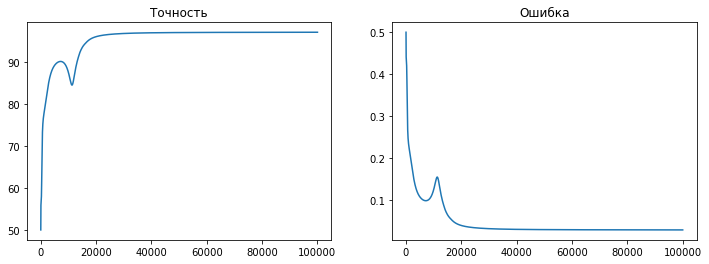

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.02
Количество эпох: 99999
Максимальная точность: 97.47439387090576
Минимальная ошибка: 0.02525606129094251


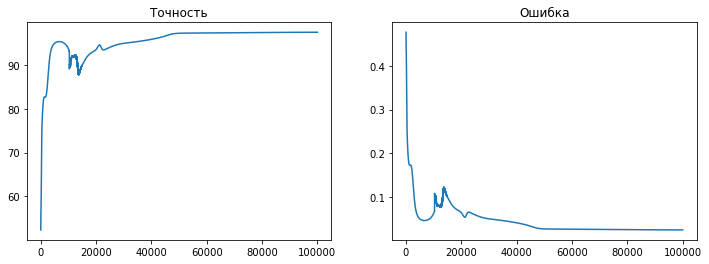

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.03
Количество эпох: 12864
Максимальная точность: 97.25044711155132
Минимальная ошибка: 0.0274955288844867


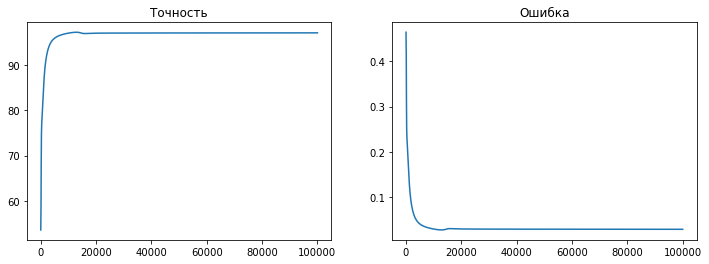

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.04
Количество эпох: 7827
Максимальная точность: 97.46572342866614
Минимальная ошибка: 0.02534276571333862


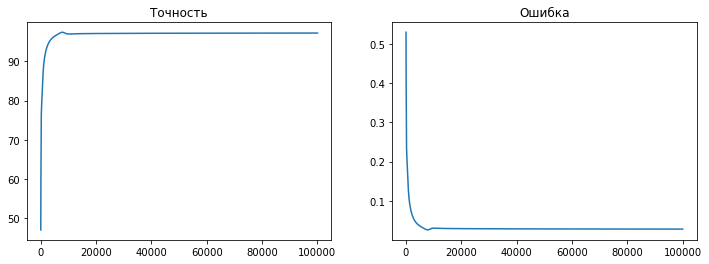

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.05
Количество эпох: 99999
Максимальная точность: 97.1745964130997
Минимальная ошибка: 0.02825403586900289


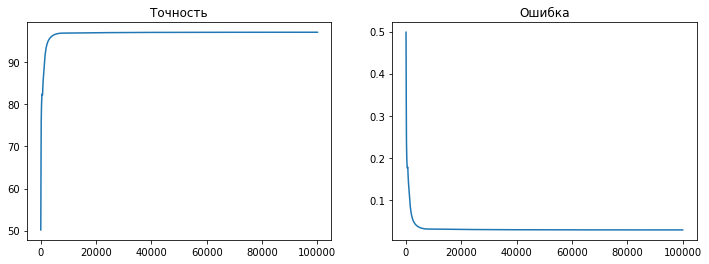

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.06
Количество эпох: 7107
Максимальная точность: 97.41206039618382
Минимальная ошибка: 0.025879396038161816


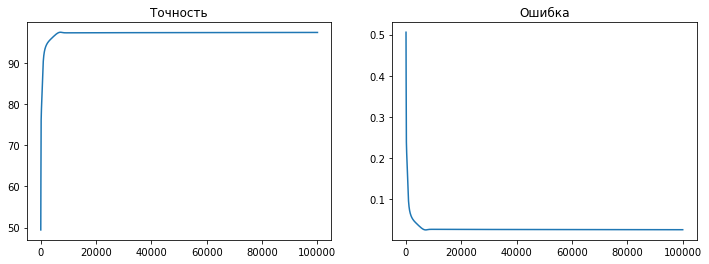

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.07
Количество эпох: 3788
Максимальная точность: 97.35845402434937
Минимальная ошибка: 0.02641545975650629


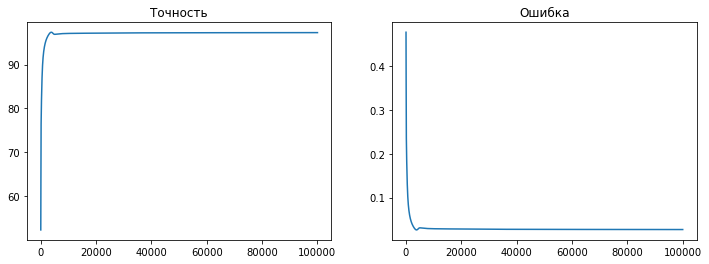

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.08
Количество эпох: 49088
Максимальная точность: 97.63565985876862
Минимальная ошибка: 0.023643401412313803


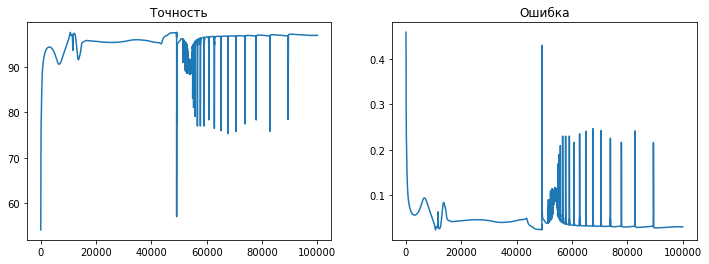

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.09
Количество эпох: 98387
Максимальная точность: 97.8389003258919
Минимальная ошибка: 0.021610996741080985


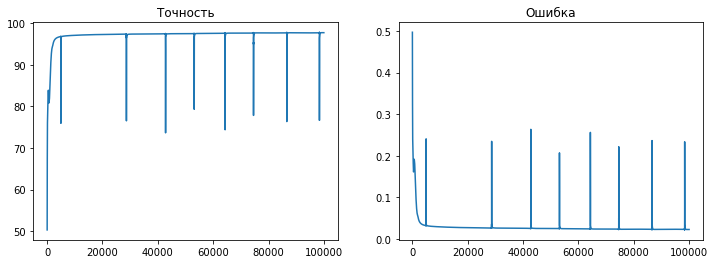

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.1
Количество эпох: 24103
Максимальная точность: 97.47355711339492
Минимальная ошибка: 0.025264428866050858


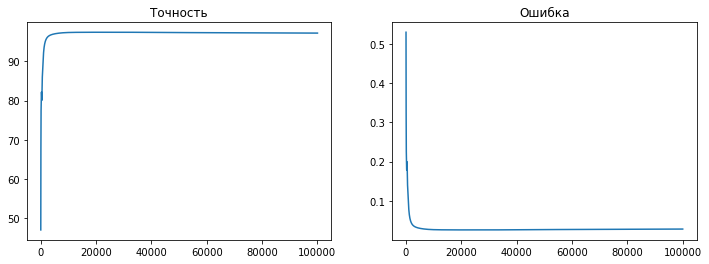

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.11
Количество эпох: 3508
Максимальная точность: 97.49357746739355
Минимальная ошибка: 0.0250642253260646


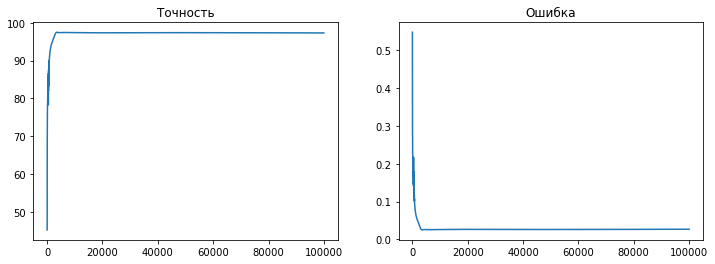

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.21
Количество эпох: 66381
Максимальная точность: 97.81687238454714
Минимальная ошибка: 0.021831276154528647


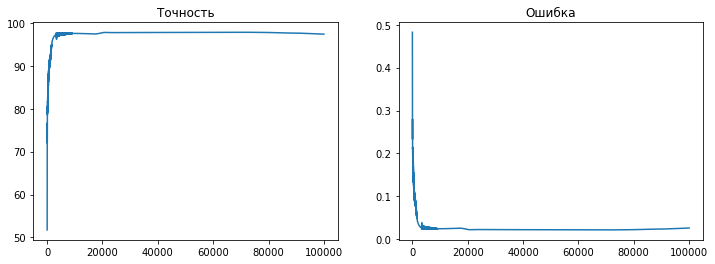

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.31
Количество эпох: 99733
Максимальная точность: 98.10201249664053
Минимальная ошибка: 0.018979875033594783


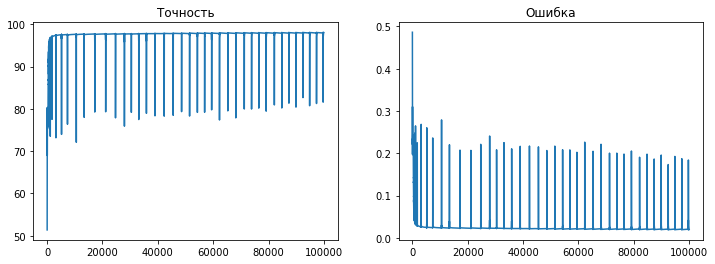

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.41
Количество эпох: 91505
Максимальная точность: 98.40750944110712
Минимальная ошибка: 0.015924905588928832


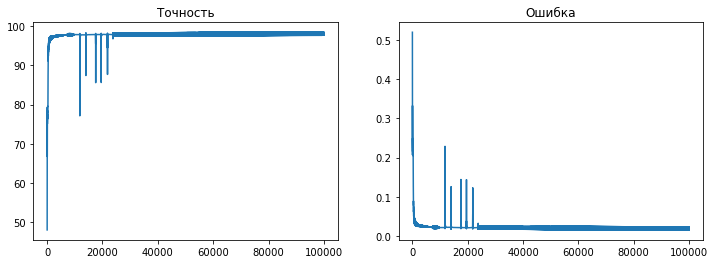

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.51
Количество эпох: 47574
Максимальная точность: 98.0670944665009
Минимальная ошибка: 0.019329055334990995


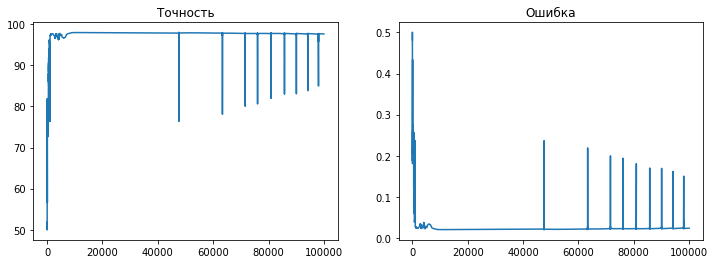

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.61
Количество эпох: 1
Максимальная точность: 64.53388964950581
Минимальная ошибка: 0.35466110350494184


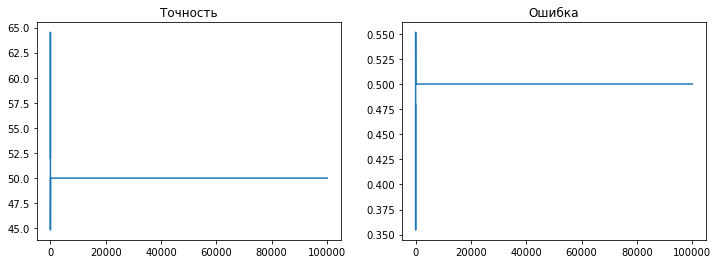

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.71
Количество эпох: 312
Максимальная точность: 80.44391758977008
Минимальная ошибка: 0.1955608241022993


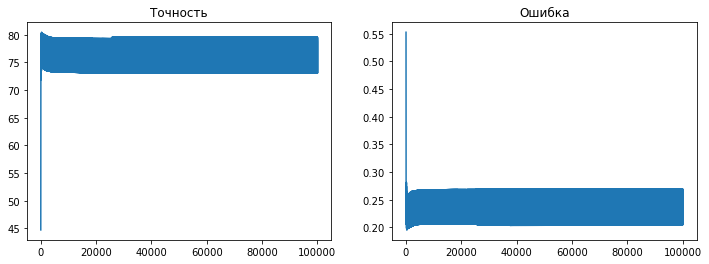

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.81
Количество эпох: 129
Максимальная точность: 82.65622272757585
Минимальная ошибка: 0.17343777272424157


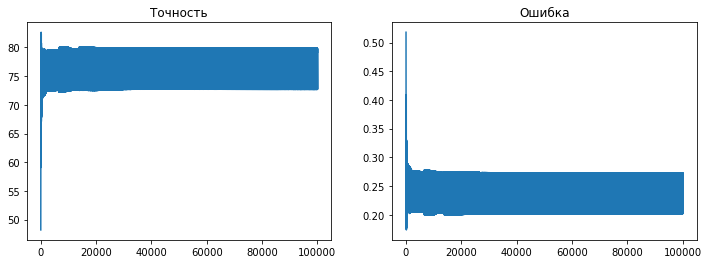

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.91
Количество эпох: 60
Максимальная точность: 68.38096109216598
Минимальная ошибка: 0.3161903890783403


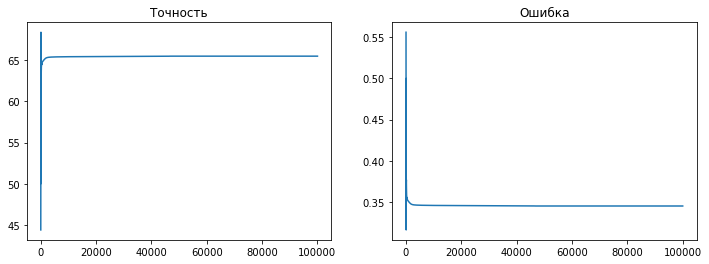

In [16]:
for i in range(len(ns)):
    if (i < 10 or i % 10 == 0):
        print('Значения при которых достигается минимальная ошибка и максимальная точность')
        print(f'Cкорость обучения: {ns[i]}')
        print(f'Количество эпох: {acs[i].index(max(acs[i]))}')
        print(f'Максимальная точность: {max(acs[i])}')
        print(f'Минимальная ошибка: {min(ers[i])}')
        
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(acs[i])
        plt.title('Точность')
        
        plt.subplot(1, 2, 2)
        plt.plot(ers[i])
        plt.title('Ошибка')
        plt.show()

Посмотрим значения точности и ошибки в зависимости от скорости обучения

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.16
Количество эпох: 0
Максимальная точность: 57.4472341177659
Минимальная ошибка: 0.425527658822341


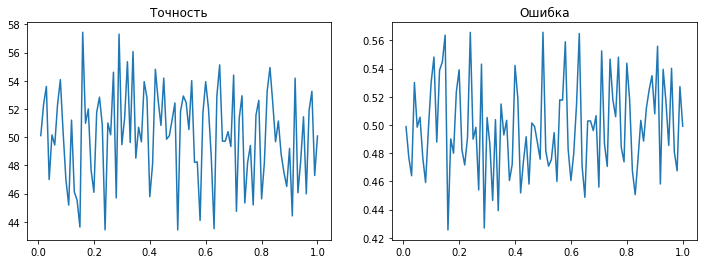

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.51
Количество эпох: 10000
Максимальная точность: 97.98810951635899
Минимальная ошибка: 0.020118904836410132


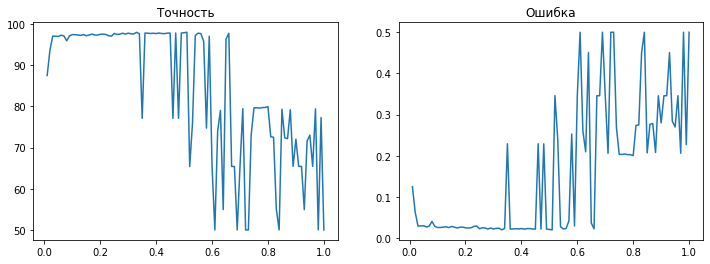

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.33
Количество эпох: 20000
Максимальная точность: 98.08920068079743
Минимальная ошибка: 0.01910799319202558


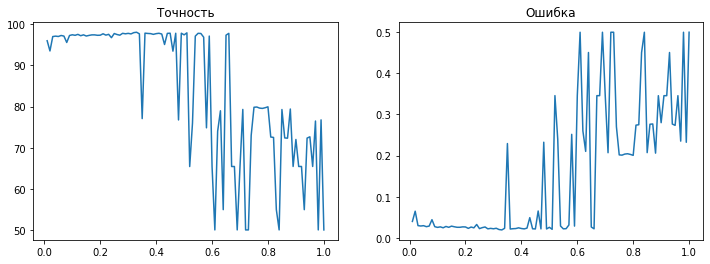

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.33
Количество эпох: 30000
Максимальная точность: 98.15506304310406
Минимальная ошибка: 0.01844936956895934


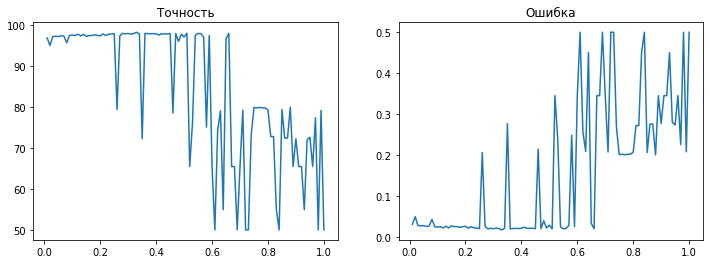

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.33
Количество эпох: 40000
Максимальная точность: 98.18752476690891
Минимальная ошибка: 0.018124752330910893


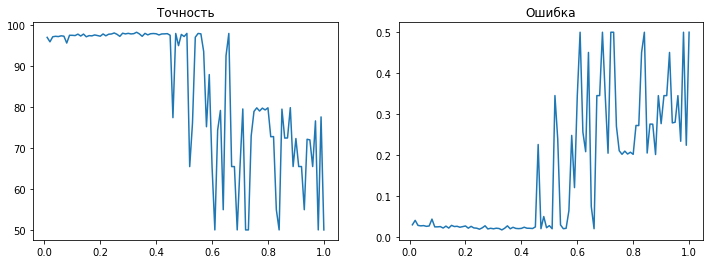

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.33
Количество эпох: 50000
Максимальная точность: 98.19446451865674
Минимальная ошибка: 0.018055354813432574


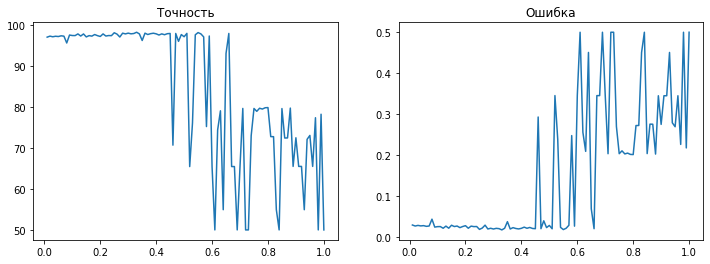

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.33
Количество эпох: 60000
Максимальная точность: 98.23150658018226
Минимальная ошибка: 0.017684934198177453


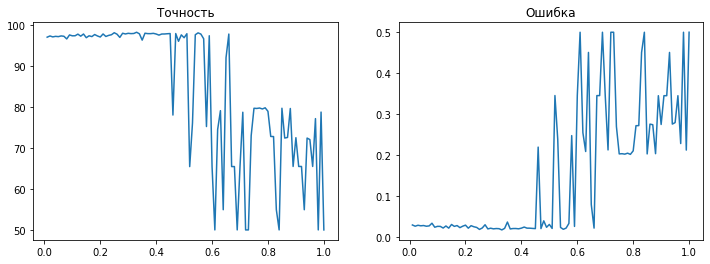

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.33
Количество эпох: 70000
Максимальная точность: 98.2449597463964
Минимальная ошибка: 0.017550402536035882


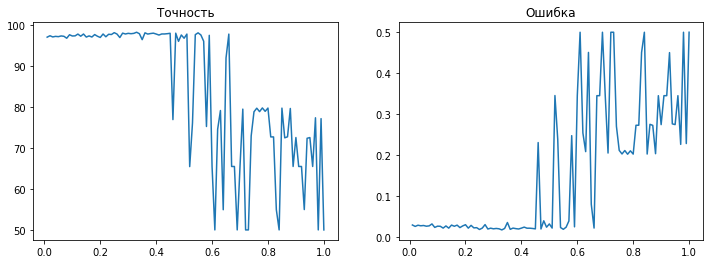

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.33
Количество эпох: 80000
Максимальная точность: 98.2466929088789
Минимальная ошибка: 0.01753307091121108


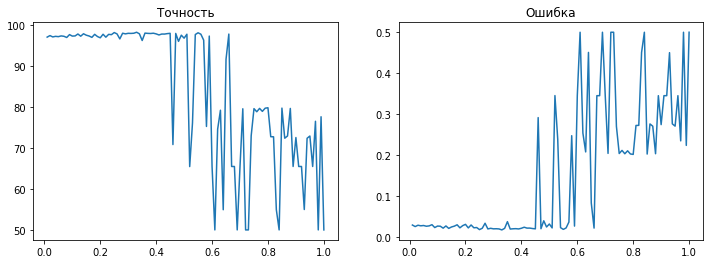

Значения при которых достигается минимальная ошибка и максимальная точность
Cкорость обучения: 0.23
Количество эпох: 90000
Максимальная точность: 98.44111586589659
Минимальная ошибка: 0.015588841341034054


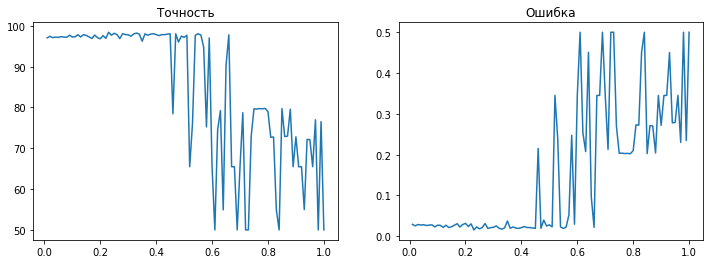

In [19]:
for j in range(len(acs[0])):
    if (j == 0 or j % 10000 == 0):
        res_acs = []
        res_ers = []
        for i in range(len(ns)):
            res_acs.append(acs[i][j])
            res_ers.append(ers[i][j])
            
        print('Значения при которых достигается минимальная ошибка и максимальная точность')
        print(f'Cкорость обучения: {ns[res_acs.index(max(res_acs))]}')
        print(f'Количество эпох: {j}')
        print(f'Максимальная точность: {max(res_acs)}')
        print(f'Минимальная ошибка: {min(res_ers)}')
        
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(ns, res_acs)
        plt.title('Точность')
        
        plt.subplot(1, 2, 2)
        plt.plot(ns, res_ers)
        plt.title('Ошибка')
        plt.show()

In [20]:
max = 0.
min = 100.
j = 0
index = -1
for i in range(len(ns)):
    if max < np.array(acs[i]).max():
        max = np.array(acs[i]).max()
        j = acs[i].index(max)
        index = i
    if min > np.array(ers[i]).min():
        min = np.array(ers[i]).min()

print(f'Cкорость обучения: {ns[index]}')
print(f'Количество эпох: {j}')
print(f'Максимальная точность: {max}')
print(f'Минимальная ошибка: {min}')

Cкорость обучения: 0.23
Количество эпох: 98180
Максимальная точность: 98.74765719586371
Минимальная ошибка: 0.012523428041362975


**Выводы:**
1. Точность повышается, а ошибка становится меньше при увеличении количества эпох обучения и при уменьшении скорости обучения.
2. При росте скорости обучения решение перестает сходиться. Самое оптимальное значение скорости обучения около 0.2.
3. Задавать большое количество эпох обучения смысла не имеет, так как после 7000-10000 эпох точность перестает существенно увеличиваться и ошибка перестает уменьшаться. Задав меньшее количество эпох мы не снижая качества получим более быстрый процесс обучения.